___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [3]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [5]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [6]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [7]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [9]:
X_train[5].shape

(28, 28)

In [10]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  88, 221, 215, 217, 219, 211, 185, 150, 118,
        107,  99,  88,  83,  90, 135, 212, 203, 207, 219, 169,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  27, 118, 162,  40,   0,   0,   0,  10,
         19,  28,  39,  47,  36,   0,   0, 203, 230, 220, 203,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 138, 136,  71,  69,  54, 216, 217, 203, 184,
        168, 163, 162, 163, 178, 221, 186,  38,  26,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  67, 134, 154, 224, 129,  66,  81, 117, 129,
        128, 132, 137, 131, 129,  86,  73, 157, 151, 134, 216,  18,   0,
          0,   0],
       [  0,   0,   0,   0, 203, 198, 172, 183, 206, 255, 255, 250, 243,
        240, 239, 235, 238, 244, 255, 238, 184, 160,  86,  98,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 122, 188, 224, 151, 105, 127,  97, 100, 105,
        114, 117, 117, 113, 103,  98, 111, 142, 254, 191, 255,  49,   0,
          0,   0],
       [  0,   0,   0,   0, 163, 179, 200,  95, 154, 198, 197, 200, 200,
        198, 197, 198, 199, 202, 200, 176,  86, 206, 157, 162,  10,   0,
          0,   0],
       [  0,   0,   0,   0, 197, 201, 229,  71, 144, 194, 181, 183, 179,
        182, 180, 179, 180, 190, 185, 197,  76, 219, 185, 201,  34,   0,
          0,   0],
       [  0,   0,   0,   0, 199, 193, 226,  58, 154, 192, 184, 187, 184,
        186, 184, 185, 183, 192, 191, 200,  56, 219, 203, 207,  60,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 194, 224,  41, 163, 190, 186, 186, 184,
        185, 183, 185, 178, 190, 194, 202,  33, 211, 200, 206,  73,   0,
          0,   0],
       [  0,   0,   0,   0, 201, 197, 222,  17, 172, 190, 186, 187, 182,
        186, 185, 187, 180, 187, 193, 202,  26, 212, 202, 203,  76,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 177, 189, 184, 185, 178,
        184, 183, 184, 180, 183, 189, 203,  35, 196, 203, 203,  84,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 197, 223,   0, 185, 187, 185, 187, 180,
        184, 182, 183, 178, 182, 183, 205,  44, 159, 207, 201,  85,   0,
          0,   0],
       [  0,   0,   0,   0, 187, 198, 225,   0, 194, 188, 184, 185, 180,
        183, 183, 184, 181, 181, 177, 206,  46, 129, 211, 200,  88,   0,
          0,   0],
       [  0,   0,   0,   6, 186, 200, 211,   0, 199, 189, 184, 184, 185,
        182, 183, 184, 185, 182, 175, 205,  50,  97, 216, 197,  93,   0,
          0,   0],
       [  0,   0,   0,   5, 185, 204, 184,   0, 202, 188, 182, 182, 183,
        183, 184, 182, 180, 182, 174, 202,  63,  59, 220, 196,  94,   0,
          0,   0],
       [  0,   0,   0,   5, 184, 206, 157,   0, 204, 187, 187, 189, 192,
        190, 190, 191, 190, 187, 183, 202,  78,  35, 222, 197,  95,   0,
          0,   0],
       [  0,   0,   0,   5, 183, 208, 127,   0, 197, 166, 153, 149, 149,
        146, 148, 149, 150, 151, 158, 191,  90,   8, 223, 195,  99,   0,
          0,   0],
       [  0,   0,   0,   6, 184, 208, 11

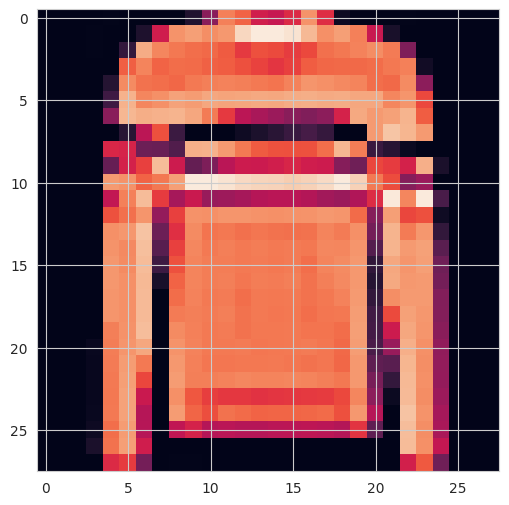

In [11]:
plt.imshow(X_train[5])
plt.show()

In [12]:
y_train[5]

2

In [13]:
y_train.shape

(60000,)

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [16]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [17]:
y_train[0]

9

In [18]:
classes[y_train[0]]

'Ankle boot'

In [19]:
classes[int(y_train[0])]

'Ankle boot'

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
X_train[5].min()

0

In [21]:
X_train[5].max()

255

In [22]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [23]:
X_train[5].min()

0.0

In [24]:
X_train[5].max()

1.0

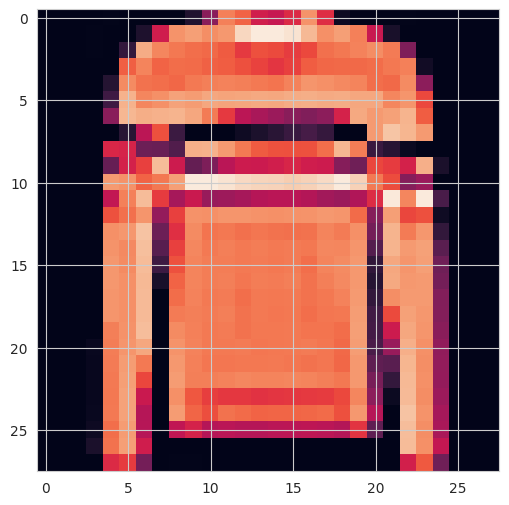

In [25]:
plt.imshow(X_train[5])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
y_train.shape

(60000,)

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [33]:
y_train[9]

5

In [34]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [36]:
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)  # stride = 1, padding = valid

model.add(MaxPool2D(pool_size=(2, 2)))  # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607394 (2.32 MB)
Trainable params: 607394 (2.32 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [40]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4123 - accuracy: 0.8526 - val_loss: 0.3598 - val_accuracy: 0.8701
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2738 - accuracy: 0.9020 - val_loss: 0.2874 - val_accuracy: 0.8973
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2325 - accuracy: 0.9165 - val_loss: 0.2628 - val_accuracy: 0.9043
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2037 - accuracy: 0.9262 - val_loss: 0.2880 - val_accuracy: 0.8984
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1841 - accuracy: 0.9331 - val_loss: 0.2780 - val_accuracy: 0.9047
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1665 - accuracy: 0.9392 - val_loss: 0.2651 - val_accuracy: 0.9040
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1535 - accuracy: 0.9449 - val_loss: 0.2779 - val_accur

In [41]:
X_train.shape

(60000, 28, 28, 1)

In [42]:
Y_train.shape

(60000, 10)

In [43]:
model.metrics_names

['loss', 'accuracy']

In [44]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.412,0.853,0.360,0.870
1,0.274,0.902,0.287,0.897
2,0.232,0.916,0.263,0.904
3,0.204,0.926,0.288,0.898
4,0.184,0.933,0.278,0.905


**TASK 7: Plot values of metrics you used in your model.**


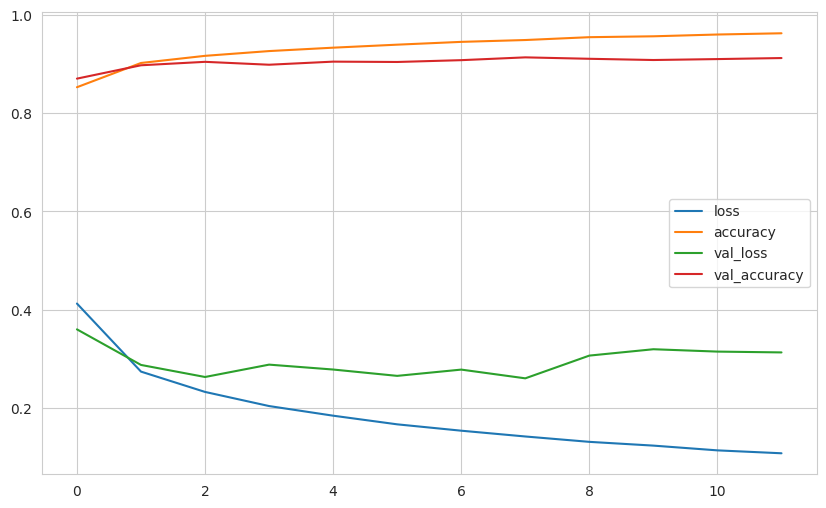

In [45]:
summary.plot();

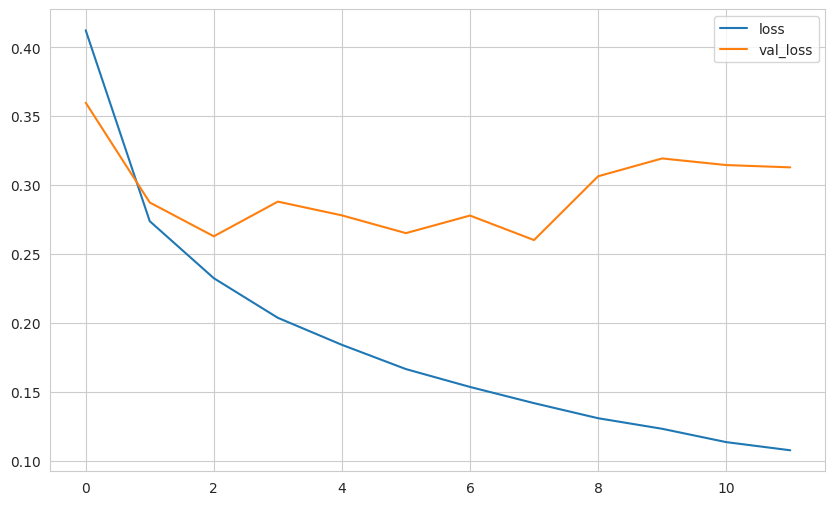

In [46]:
summary[["loss", "val_loss"]].plot();

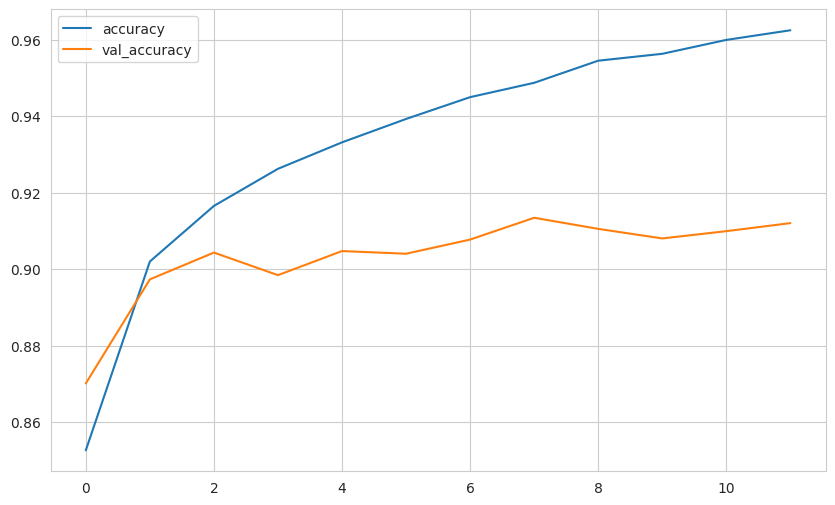

In [47]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [48]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [49]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.9134


[0.2601168155670166, 0.9133999943733215]

In [50]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2601168155670166
Test accuracy: 0.9133999943733215


In [51]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[2.31008016e-07, 5.31117761e-10, 4.08577812e-08, ...,
        1.05189474e-03, 4.49354417e-07, 9.98867512e-01],
       [3.07775849e-06, 2.50655802e-14, 9.99989510e-01, ...,
        9.89045051e-15, 2.12272555e-13, 1.11219940e-11],
       [2.45452481e-09, 1.00000000e+00, 5.51904251e-11, ...,
        2.04640105e-09, 2.31147990e-09, 9.82952816e-11],
       ...,
       [6.33432806e-10, 8.04457630e-16, 3.19116573e-08, ...,
        8.73199113e-08, 9.99999523e-01, 2.45513453e-11],
       [1.14254856e-10, 1.00000000e+00, 3.26821625e-11, ...,
        1.53369839e-09, 6.91910348e-11, 2.71149492e-10],
       [6.22563093e-05, 1.11919746e-06, 6.88777189e-04, ...,
        2.02256829e-01, 6.33019349e-03, 5.97748393e-03]], dtype=float32)

In [52]:
pred_prob.shape

(10000, 10)

In [53]:
pred_prob[0]

array([2.31008016e-07, 5.31117761e-10, 4.08577812e-08, 1.22380275e-08,
       3.23162186e-09, 7.95212181e-05, 3.80565751e-07, 1.05189474e-03,
       4.49354417e-07, 9.98867512e-01], dtype=float32)

In [54]:
np.argmax(pred_prob[0])

9

In [55]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [56]:
y_pred.shape

(10000,)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.85      0.85      1000
           3       0.92      0.93      0.92      1000
           4       0.82      0.92      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.80      0.70      0.75      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [58]:
print(confusion_matrix(y_test, y_pred))

[[886   0  29  14   6   1  62   0   2   0]
 [  1 977   3  11   2   0   4   0   2   0]
 [ 19   0 846   6  78   0  51   0   0   0]
 [ 11   2  11 926  30   0  19   0   1   0]
 [  0   1  31  18 916   1  32   0   1   0]
 [  0   0   0   0   0 967   0  16   0  17]
 [121   1  63  23  86   0 702   0   4   0]
 [  0   0   0   0   0   6   0 977   1  16]
 [  3   0   4   6   3   1   3   2 978   0]
 [  0   0   0   0   0   3   1  37   0 959]]


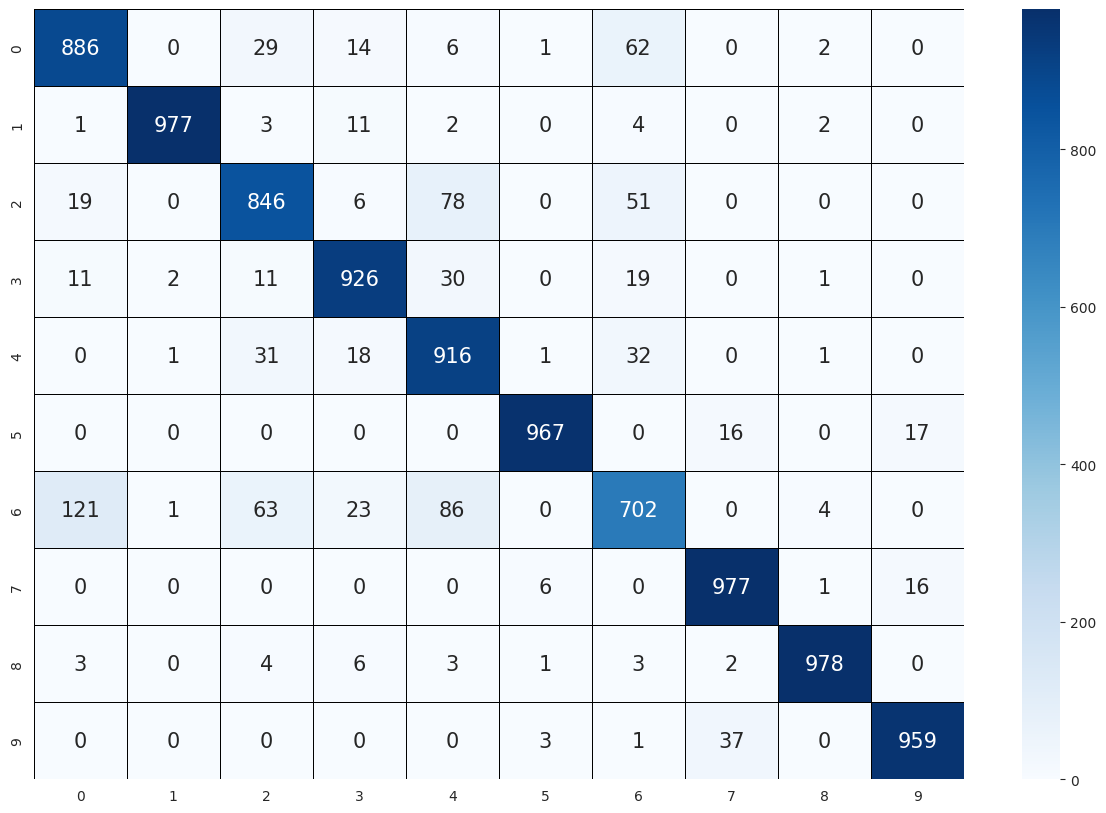

In [59]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [60]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [61]:
np.not_equal(y_test, y_pred).sum()

866

In [62]:
np.equal(y_test, y_pred).sum()

9134

## Prediction

In [115]:
my_image = X_test[1000]

In [116]:
my_image.shape

(28, 28, 1)

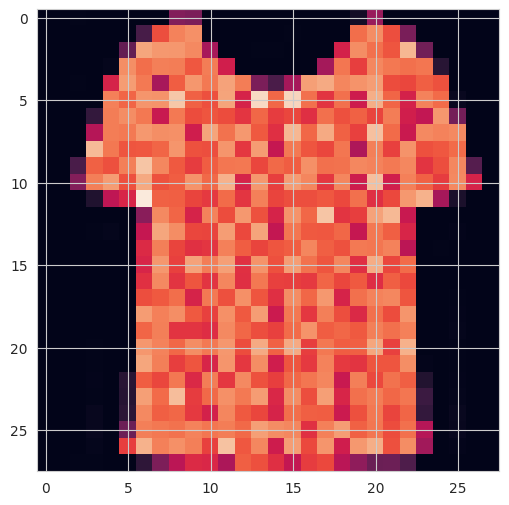

In [117]:
plt.imshow(my_image)
plt.show()

In [118]:
image_prediction = model.predict(my_image.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 26ms/step


In [119]:
image_prediction

array([[2.2983521e-01, 2.8750247e-07, 4.2160216e-05, 3.5855837e-06,
        6.8169790e-08, 2.2980158e-09, 7.7011830e-01, 4.9950383e-10,
        3.6212452e-07, 5.6999259e-09]], dtype=float32)

In [120]:
np.argmax(image_prediction, axis=1)

array([6])

In [121]:
result = np.argmax(image_prediction, axis=1)

In [122]:
result

array([6])

In [123]:
classes[int(result)]

<ipython-input-123-749b2fb52b8a>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(result)]


'Shirt'

In [124]:
original=np.argmax(Y_test[1000])

In [125]:
original

0

In [126]:
classes[int(original)]

'T-shirt/top'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___